# Wisconsin variants called using Wisconsin pipeline vs Washington pipeline

**Date**: written 2021-01-28   
**Author**: Katarina Braun 


## Overview

Here we are going to compare variants called using the Wisconsin pipeline and the Washington pipeline. We want to make sure there is a relatively high percent overlap here. 

### input 

- `../data/WI_vs_WA/WI_variants_from_WA_pipeline/*`
- `../data/WI_vs_WA/WI_variants_from_WI_pipeline/*`

### figure 

- `../figures/WI_vs_WA.png`

### import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
import seaborn as sns
from scipy import stats

## data cleaning

### define functions for data cleaning -- this will clean WA VCFs 

In [2]:
# get a list of filenames without the extension from some directory 
# example usage: `get_files('../data_derived/SNV', 'VCFlist')`
def get_files(path): 
    filelist = [os.path.splitext(filename)[0] for filename in os.listdir(path)]
    filelist.remove('.DS_Store')
    return(filelist)
#     print(filelist)

# load all text files in a directory into Pandas dataframes 
def load_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.vcf')]
    list_of_DFs = []
    for file in filelist: 
        DF = path + '/' + file + '.vcf'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False, skiprows=23)
        list_of_DFs.append(file)
    print(filelist)
    return(list_of_DFs)

# manipulate SNV dataframes 
# first run load_dataframes and generate a variable for the list of DFs, then feed that variable 
# into this function to clean the dataframe up and save to new CSV 
def clean_dataframes(path, list_of_DFs):
    for DF in list_of_DFs:
        sample = DF.columns[9]
        DF2 = DF.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
        DF2 = DF2[['POS', 'REF', 'ALT']] #POS, REF, ALT
        DF3 = DF[sample].str.split(':', expand=True) #nothing here (just need this DF to expand column 26)
        DF5 = DF3[[6]]
        DF = pd.concat([DF2, DF5], axis=1, join='inner')
        DF['SNP'] = DF['REF'] + '_' + DF['ALT'] + '_' + DF['POS'].astype(str)
        DF[6] = DF[6].str.replace(r'%', '')
        DF[6] = DF[6].astype(float)
        DF[6] = DF[6].div(100)
        DF = DF.rename(columns={6:'FREQ'})
        DF = DF[['SNP', 'FREQ']]
        DF.to_csv('../data/WI_vs_WA/compare/' + sample + '_WA.csv', sep='\t')
#

#### VCF file data-cleaning

In [3]:
# generate a list of dataframes, loaded from Illumina VCF files 
list_of_DFs = load_dataframes('../data/WI_vs_WA/WI_variants_from_WA_pipeline/')

['B_rep2', '53_rep1', '51_rep2', '50_rep2', '46_rep2', '31_rep1', '51_rep1', '30_rep2', '50_rep1', '30_rep1', '29P_rep2', '28_rep2', '29P_rep1', '24P_rep1', '25_rep1', '25_rep2', '24P_rep2', '20_rep1', '18_rep2', '19_rep1', '20_rep2', '28_rep1', '18_rep1', '12P_rep2', '17_rep2', '17_rep1', '26P_rep1', '12_rep2', '6_rep1', '5_rep1', '5_rep2', '6P_rep1', '6P_rep2', '8_rep2', '12_rep1', '8_rep1', '12P_rep1', '6_rep2', '1P_rep2', '1P_rep1', '148_rep1', '145_rep1', '130_rep1', '128_rep2', '139_rep2', '139_rep1', '130_rep2', '128_rep1', '125_rep1', '118_rep1', '124_rep1', '118_rep2', '125_rep2', '124_rep2', '117_rep2', '99_rep2', '117_rep1', '94_rep1', '95_rep1', '94_rep2', '99_rep1', '82_rep2', '95_rep2', '81_rep2', '82_rep1', '81_rep1', '80_rep2', '80_rep1', '79_rep1', '79_rep2', '74_rep1', '74_rep2', '65_rep1', '64_rep1', '64_rep2', '60_rep2', '60_rep1', '61_rep2', '57_rep2', '61_rep1', '57_rep1', '54_rep1', '55_rep1', '54_rep2', '55_rep2', '56_rep2', '56_rep1', '32_rep1', '44_rep2', '32_

In [4]:
# clean up all of the dataframes and save to new CSV files 
clean_dataframes('../data/WI_vs_WA/WI_variants_from_WA_pipeline/', list_of_DFs)

### define functions for data cleaning -- this will clean WI VCFs 

In [5]:
# get a list of filenames without the extension from some directory 
def get_files(path): 
    filelist = [os.path.splitext(filename)[0] for filename in os.listdir(path)]
    filelist.remove('.DS_Store')
    return(filelist)
#     print(filelist)

# load all text files in a directory into Pandas dataframes 
def load_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.vcf')]
    list_of_DFs = []
    for file in filelist: 
        DF = path + '/' + file + '.vcf'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False, skiprows=56)
        list_of_DFs.append(file)
    print(filelist)
    return(list_of_DFs)

def load_filered_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.vcf.recode.vcf')]
    list_of_DFs = []
    for file in filelist: 
        DF = path + '/' + file + '.vcf'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False, skiprows=56)
        list_of_DFs.append(file)
    print(filelist)
    return(list_of_DFs)

# into this function to clean the dataframe up and save to new CSV 
def clean_dataframes(path, list_of_DFs):
    if not os.path.exists(path + '/cleaned'):
            os.makedirs(path + '/cleaned')
    for DF in list_of_DFs:
        sample = DF.columns[9]
        DF2 = DF.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
        DF2 = DF2[['POS', 'REF', 'ALT']] #POS, REF, ALT
        DF3 = DF['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
        DF5 = DF3[[12]] #SNP frequency 
        DF5 = DF5.rename(columns={12:'FREQ'})
        DF4 = DF3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
        DF4 = DF4[[1,3,9,10]]
        DF4 = DF4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
        DF = pd.concat([DF2, DF4, DF5], axis=1, join='inner')
        DF['FREQ'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
        DF['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
        DF['nt_change'] = DF['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
        DF['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
        DF['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
        DF['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
        DF['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
        DF['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
        DF['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
        DF['SNP'] = DF['REF'] + '_' + DF['ALT'] + '_' + DF['POS'].astype(str)
        DF["FREQ"] = pd.to_numeric(DF["FREQ"]) #convert FREQ column from object type to int
        DF = DF[DF.POS >= 54] # drop any variants that are called before nt position 55
        DF = DF[DF.POS <= 29837] # drop any variants that are called after nt position 29837
        DF = DF[['SNP', 'FREQ']]
#         DF = DF[DF.FREQ >= 0.03]
        DF.to_csv('../data/WI_vs_WA/compare/' + sample + '_WI.csv', sep='\t')



In [6]:
# generate a list of dataframes, loaded from Illumina VCF files 
list_of_DFs = load_dataframes('../data/WI_vs_WA/WI_variants_from_WI_pipeline/')

['1P_rep1', '1P_rep2', '5_rep1', '5_rep2', '6_rep1', '6_rep2', '6P_rep1', '6P_rep2', '8_rep1', '8_rep2', '12_rep1', '12_rep2', '12P_rep1', '12P_rep2', '17_rep1', '17_rep2', '18_rep1', '18_rep2', '20_rep1', '20_rep2', '24P_rep1', '24P_rep2', '25_rep1', '25_rep2', '26P_rep1', '26P_rep2', '28_rep1', '28_rep2', '29P_rep1', '29P_rep2', '30_rep1', '30_rep2', '31_rep1', '31_rep2', '32_rep1', '32_rep2', '44_rep1', '44_rep2', '46_rep1', '46_rep2', '50_rep1', '50_rep2', '51_rep1', '51_rep2', '53_rep1', '53_rep2', '54_rep1', '54_rep2', '55_rep1', '55_rep2', '56_rep1', '56_rep2', '57_rep1', '57_rep2', '60_rep1', '60_rep2', '61_rep1', '61_rep2', '64_rep1', '64_rep2', '65_rep1', '65_rep2', '74_rep1', '74_rep2', '79_rep1', '79_rep2', '80_rep1', '80_rep2', '81_rep1', '81_rep2', '82_rep1', '82_rep2', '94_rep1', '94_rep2', '95_rep1', '95_rep2', '99_rep1', '99_rep2', '117_rep1', '117_rep2', '118_rep1', '118_rep2', '124_rep1', '124_rep2', '125_rep1', '125_rep2', '128_rep1', '128_rep2', '130_rep1', '130_re

In [7]:
clean_dataframes('../data/WI_vs_WA/WI_variants_from_WI_pipeline/', list_of_DFs)

In [8]:
# load all intersection files in a directory into Pandas dataframes 
def load_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.csv')]
    list_of_DFs = []
    list_of_DF_names = []
    for file in filelist: 
        fullname = path + '/' + file + '.csv'
        DF = pd.read_csv(fullname, header=0, sep='\t', low_memory=False)
        DF.name = file 
        list_of_DF_names.append(file)
        list_of_DFs.append(DF)
#     print(list_of_DF_names)
    return(list_of_DFs)


In [9]:
WI = load_dataframes('../data/WI_vs_WA/compare/')

In [10]:
def find_intersection(path, df_list):
    # create list of unique dataframe identifiers – this enables easy pairing of csvs
    value_list=[]
    value_set=[]
    for item in df_list:
        if "WI" in item:
            value = item.replace("_WI.csv","")
        if "WA" in item:
            value = item.replace("_WA.csv","")
            value_list.append(value)
#             print(value_list)
        value_set=set(value_list)   
#             print(value_list)
    for item in value_set:
        # create dataframes from csv files
        WI_path = path + item + '_WI.csv'
        WI_df = pd.read_csv(WI_path, sep='\t')
        WA_path = path + item + '_WA.csv'
        WA_df = pd.read_csv(WA_path, sep='\t')
        # clean up column names
        WI_df = WI_df.rename(columns={'FREQ': '%-WI'})
        WA_df = WA_df.rename(columns={'FREQ': '%-WA'})
        A1_1m = WI_df[['SNP', '%-WI']]
        B1_1m = WA_df[['SNP', '%-WA']]
        df1_1 = pd.merge(A1_1m, B1_1m, on='SNP', how='outer')
#         df1_1['POS_x'] = df1_1['POS_x'].fillna(df1_1['POS_y'])
        df1_1 = df1_1[['SNP', '%-WI', '%-WA']]
#         df1_1 = df1_1.sort_values('POS_x', ascending=True)
        df1_1['FREQ'] = df1_1[['%-WI', '%-WA']].mean(axis=1)
        df1_1 = df1_1.rename(columns={'%-WI': 'WI_percent', '%-WA': 'WA_percent'})
#         df1_1.loc[df1_1.FREQ >= 0.97, 'FREQ'] = 1.0 # any SNVs average >0.97 FREQ are likely fixed so I'll rewrite anything >0.97 to 1.0
        df1_1 = df1_1.rename(columns={'FREQ': '%'})
        df1_1_intersection = df1_1.dropna()
#         print(df1_1_intersection)
        df1_1_intersection.to_csv('../data/WI_vs_WA/intersection/'+ item + 'intersection.csv', sep='\t')
    
    #

In [11]:
%%bash

# delete the CSVs that don't have replicates 

rm '../data/WI_vs_WA/compare/19_rep1_WA.csv'
rm '../data/WI_vs_WA/compare/26P_rep2_WI.csv'
rm '../data/WI_vs_WA/compare/31_rep2_WI.csv'
rm '../data/WI_vs_WA/compare/65_rep2_WI.csv'
rm '../data/WI_vs_WA/compare/188_rep2_WA.csv'
rm '../data/WI_vs_WA/compare/196_rep1_WI.csv'
rm '../data/WI_vs_WA/compare/196_rep2_WI.csv'
rm '../data/WI_vs_WA/compare/316_rep2_WI.csv'
rm '../data/WI_vs_WA/compare/391_rep2_WA.csv'
rm '../data/WI_vs_WA/compare/552_rep1_WA.csv'
rm '../data/WI_vs_WA/compare/552_rep2_WA.csv'
rm '../data/WI_vs_WA/compare/1064_rep1_WA.csv'
rm '../data/WI_vs_WA/compare/1144_rep1_WA.csv'
rm '../data/WI_vs_WA/compare/1346_rep1_WA.csv'

#

In [12]:
# make a list of the cleaned CSV files 
directory = '../data/WI_vs_WA/compare/'
files_dir =  os.listdir(directory)
newlist = []
for names in files_dir:
    if names.endswith(".csv"):
        newlist.append(names)
print(newlist)

['B_rep2_WA.csv', '53_rep1_WA.csv', '51_rep2_WA.csv', '50_rep2_WA.csv', '46_rep2_WA.csv', '31_rep1_WA.csv', '51_rep1_WA.csv', '30_rep2_WA.csv', '50_rep1_WA.csv', '30_rep1_WA.csv', '29P_rep2_WA.csv', '28_rep2_WA.csv', '29P_rep1_WA.csv', '24P_rep1_WA.csv', '25_rep1_WA.csv', '25_rep2_WA.csv', '24P_rep2_WA.csv', '20_rep1_WA.csv', '18_rep2_WA.csv', '20_rep2_WA.csv', '28_rep1_WA.csv', '18_rep1_WA.csv', '12P_rep2_WA.csv', '17_rep2_WA.csv', '17_rep1_WA.csv', '26P_rep1_WA.csv', '12_rep2_WA.csv', '6_rep1_WA.csv', '5_rep1_WA.csv', '5_rep2_WA.csv', '6P_rep1_WA.csv', '6P_rep2_WA.csv', '8_rep2_WA.csv', '12_rep1_WA.csv', '8_rep1_WA.csv', '12P_rep1_WA.csv', '6_rep2_WA.csv', '1P_rep2_WA.csv', '1P_rep1_WA.csv', '148_rep1_WA.csv', '145_rep1_WA.csv', '130_rep1_WA.csv', '128_rep2_WA.csv', '139_rep2_WA.csv', '139_rep1_WA.csv', '130_rep2_WA.csv', '128_rep1_WA.csv', '125_rep1_WA.csv', '118_rep1_WA.csv', '124_rep1_WA.csv', '118_rep2_WA.csv', '125_rep2_WA.csv', '124_rep2_WA.csv', '117_rep2_WA.csv', '99_rep2_WA.

In [13]:
find_intersection('../data/WI_vs_WA/compare/', newlist)

In [14]:
# load all intersection files in a directory into Pandas dataframes 
def load_intersection_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('intersection.csv')]
    list_of_DFs = []
    list_of_DF_names = []
    for file in filelist: 
        fullname = path + '/' + file + '.csv'
        DF = pd.read_csv(fullname, header=0, sep='\t', low_memory=False)
        DF.name = file 
        list_of_DF_names.append(file)
        list_of_DFs.append(DF)
#     print(list_of_DF_names)
    return(list_of_DFs)

In [15]:
#list of intersection DFs
WI_vs_WA_list = load_intersection_dataframes('../data/WI_vs_WA/intersection')
# WI_vs_WA_list

In [24]:
def plot_WI_vs_WA(DF_list, concat_dataframe):
    # global settings 
    fig1 = plt.figure(figsize=(8,8), facecolor='w')
    plt.style.use('default')
    mpl.rc('font', family='Arial')
    gs = gridspec.GridSpec(2,10)
    
    # define subplots
    ax1 = fig1.add_subplot(gs[1,0:5], aspect='equal') # replicate plot
    ax2 = fig1.add_subplot(gs[1,5:10], aspect='equal') # replicate plot ZOOM
   
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['left'].set_visible(True)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['left'].set_visible(True)
    
    # set fontsize of axes 
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)
    ax2.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax2.tick_params(axis = 'both', which = 'minor', labelsize = 10)

    # edit the axes - ax1
    ax1.set_ylabel('WA variant freq', fontname='Arial', fontsize=10)
    ax1.set_xlabel('WI variant freq', fontname='Arial', fontsize=10)
    ax1.set_facecolor('white')
    for tick in ax1.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in ax1.get_yticklabels():
        tick.set_fontname("Arial")
    ax1.set_ylim(0.001,0.9)
    ax1.set_yticks([0, 0.25, 0.50, 0.75])
    ax1.set_xlim(0.001,0.9)
    ax1.set_xticks([0, 0.25, 0.50, 0.75])
    
    # edit the axes - ax2
    ax2.set_ylabel('WA iSNV frequency (1-15%)', fontname='Arial', fontsize=10)
    ax2.set_xlabel('WI iSNV frequency (1-15%)', fontname='Arial', fontsize=10)
    ax2.set_facecolor('white')
    for tick in ax2.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in ax2.get_yticklabels():
        tick.set_fontname("Arial")
    ax2.set_ylim(-0.001, 0.15)
    ax2.set_yticks([0.05, 0.1, 0.15])
    ax2.set_xlim(-0.001, 0.15)
    ax2.set_xticks([0.05, 0.1, 0.15])
    
    r2 = stats.pearsonr(concat_dataframe['WI_percent'], concat_dataframe['WA_percent'])
    p = sns.jointplot(data=concat_dataframe, x='WI_percent', y='WA_percent', kind="reg", ylim=(0,1.03), xlim=(0,1.03), color='#7C9BAC')
    p.fig.text(0.85, 0.85, r2, fontsize=12)
    
    for DF in DF_list: 
        ax1.scatter(DF.WI_percent, DF.WA_percent, color='#7C9BAC', alpha=0.8)
        ax2.scatter(DF.WI_percent, DF.WA_percent, color='#7C9BAC', alpha=0.8)
    
    fig1.tight_layout()
    # save this plot to the figures folder 
    fig1.savefig('../figures/WI_vs_WA/WI_vs_WA.pdf', bbox_inches='tight', dpi=300)
    p.savefig('../figures/WI_vs_WA/WI_vs_WA-linear-regression.pdf', bbox_inches='tight', dpi=300)

#

In [25]:
# concatenate all dataframes in the list_of_intersectoin_DFs into a single DF 

WI_vs_WA_combined = pd.concat(WI_vs_WA_list)

# 

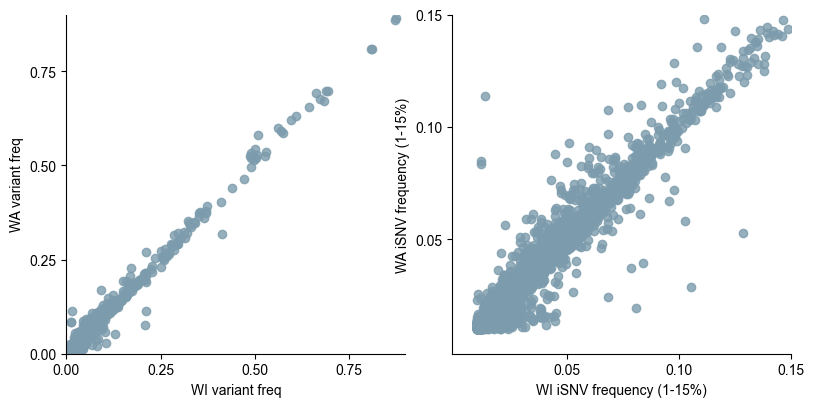

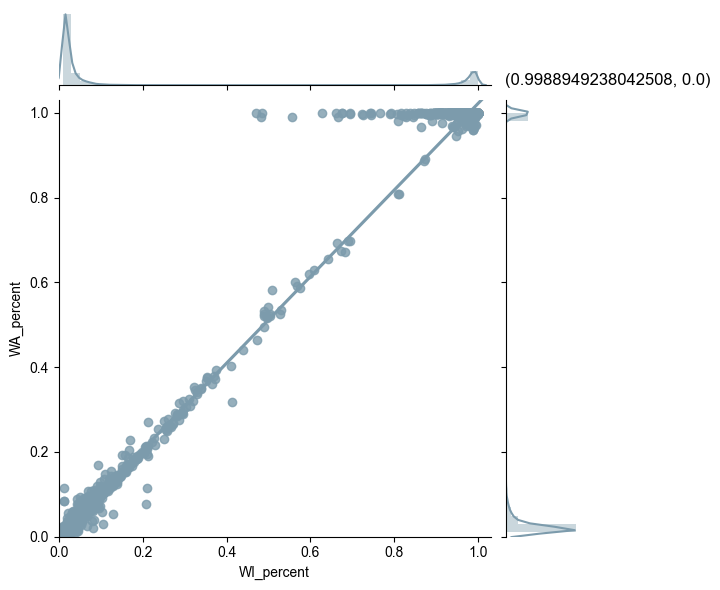

In [26]:
# plot intersections on a single plot to calculate lineaar correlation (I'd like to repeat this with multiple different frequency cut-offs)

plot_WI_vs_WA(WI_vs_WA_list, WI_vs_WA_combined)


#

In [28]:
def plot_WI_vs_WA_not_consensus(DF_list, concat_dataframe):
    # global settings 
    fig1 = plt.figure(figsize=(8,8), facecolor='w')
    plt.style.use('default')
    mpl.rc('font', family='Arial')
    gs = gridspec.GridSpec(2,10)
    
    # define subplots
    ax1 = fig1.add_subplot(gs[1,0:5], aspect='equal') # replicate plot
    ax2 = fig1.add_subplot(gs[1,5:10], aspect='equal') # replicate plot ZOOM
   
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['left'].set_visible(True)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['left'].set_visible(True)
    
    # set fontsize of axes 
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)
    ax2.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax2.tick_params(axis = 'both', which = 'minor', labelsize = 10)

    # edit the axes - ax1
    ax1.set_ylabel('WA variant freq', fontname='Arial', fontsize=10)
    ax1.set_xlabel('WI variant freq', fontname='Arial', fontsize=10)
    ax1.set_facecolor('white')
    for tick in ax1.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in ax1.get_yticklabels():
        tick.set_fontname("Arial")
    ax1.set_ylim(0.001,0.9)
    ax1.set_yticks([0, 0.25, 0.50, 0.75])
    ax1.set_xlim(0.001,0.9)
    ax1.set_xticks([0, 0.25, 0.50, 0.75])
    
    # edit the axes - ax2
    ax2.set_ylabel('WA variant freq 1-10%', fontname='Arial', fontsize=10)
    ax2.set_xlabel('WI variant freq 1-10%', fontname='Arial', fontsize=10)
    ax2.set_facecolor('white')
    for tick in ax2.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in ax2.get_yticklabels():
        tick.set_fontname("Arial")
    ax2.set_ylim(-0.001, 0.15)
    ax2.set_yticks([0.05, 0.1, 0.15])
    ax2.set_xlim(-0.001, 0.15)
    ax2.set_xticks([0.05, 0.1, 0.15])
    
    r2 = stats.pearsonr(concat_dataframe['WI_percent'], concat_dataframe['WA_percent'])
    ax = sns.jointplot(data=concat_dataframe, x='WI_percent', y='WA_percent', kind="reg", ylim=(0,0.9), xlim=(0,0.9), color='#7C9BAC')
    ax.fig.text(0.85, 0.85, r2, fontsize=12)               
                    
    for DF in DF_list: 
        ax1.scatter(DF.WI_percent, DF.WA_percent, color='#7C9BAC', alpha=0.8)
        ax2.scatter(DF.WI_percent, DF.WA_percent, color='#7C9BAC', alpha=0.8)
    
    fig1.tight_layout()
    # save this plot to the figures folder 
    fig1.savefig('../figures/WI_vs_WA/WI_vs_WA.pdf', bbox_inches='tight', dpi=300)
    ax.savefig('../figures/WI_vs_WA/WI_vs_WA-linear-regression.pdf', bbox_inches='tight', dpi=300)

#

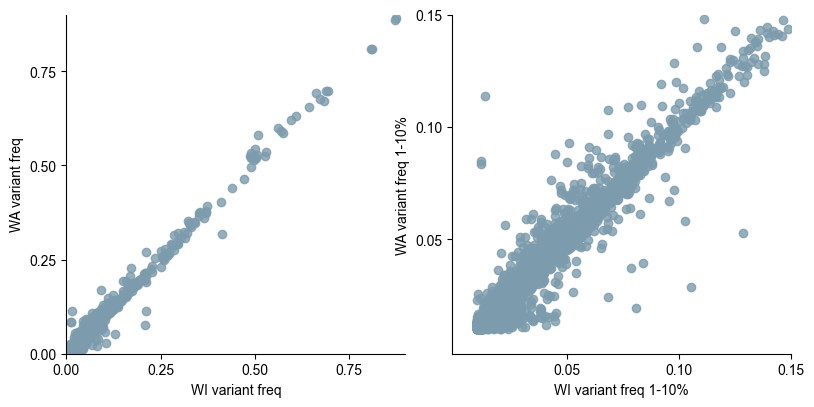

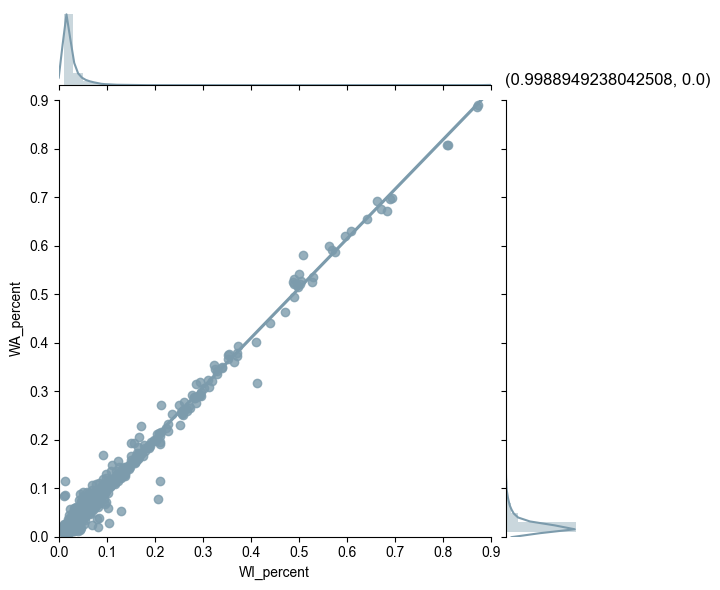

In [29]:
# plot intersections on a single plot to calculate lineaar correlation (I'd like to repeat this with multiple different frequency cut-offs)

plot_WI_vs_WA_not_consensus(WI_vs_WA_list, WI_vs_WA_combined)

